## IMPORT LIBRARIES

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/sandeepk/Desktop/DS612/ShenyangPM20100101_20151231.csv')

In [95]:
import seaborn as sb
sb.set()

In [ ]:
#Goals:
#LINEAR #PLOT
#MULTIVARIATE WITH OPTIMIZATION OF PARAMETERS (LR, RIDGE, LASSO)
#KNN (CBWD) #PLOT

#Logistic to predict what day?


In [2]:
df

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN
2,3,2010,1,1,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN
3,4,2010,1,1,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN
4,5,2010,1,1,4,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,162.0,166.0,435.0,-10.0,92.42,1031.0,-9.0,SE,2.0000,0.0,0.0
52580,52581,2015,12,31,20,4,255.0,259.0,429.0,-10.0,79.10,1030.0,-7.0,SE,5.0000,0.0,0.0
52581,52582,2015,12,31,21,4,266.0,368.0,361.0,-10.0,79.10,1030.0,-7.0,SE,8.0000,0.0,0.0
52582,52583,2015,12,31,22,4,202.0,319.0,342.0,-10.0,79.10,1028.0,-7.0,SE,11.0000,NaN,NaN


In [3]:
#Recieve na reporting
ls = list(df.columns)
for x in ls:
  if sum(df[x].isna()) > 0:
    print(x)
    print(sum(df[x].isna()))
    print()

PM_Taiyuanjie
28196

PM_US Post
30904

PM_Xiaoheyan
27957

DEWP
692

HUMI
680

PRES
692

TEMP
692

cbwd
692

Iws
692

precipitation
12763

Iprec
12763



In [7]:
#copy below later
#df = df[df['DEWP'].isna() == False]
#df = df[df['TEMP'].isna() == False]
#df

,No,year,month,day,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
1,2,2010,1,1,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN
2,3,2010,1,1,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN
3,4,2010,1,1,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN
4,5,2010,1,1,4,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,162.0,166.0,435.0,-10.0,92.42,1031.0,-9.0,SE,2.0000,0.0,0.0
52580,52581,2015,12,31,20,4,255.0,259.0,429.0,-10.0,79.10,1030.0,-7.0,SE,5.0000,0.0,0.0
52581,52582,2015,12,31,21,4,266.0,368.0,361.0,-10.0,79.10,1030.0,-7.0,SE,8.0000,0.0,0.0
52582,52583,2015,12,31,22,4,202.0,319.0,342.0,-10.0,79.10,1028.0,-7.0,SE,11.0000,NaN,NaN


## LINEAR REGRESSION
- Predictor: Dew Point
- Outcome: Temperature

In [11]:
df1 = df.copy()
x = df1['DEWP']
y = df1['TEMP']
print ('Correlation(x, y) = ',np.corrcoef(x,y)[0,1])

#Positive Linear Relationship

Correlation(x, y) =  0.9095702332955348


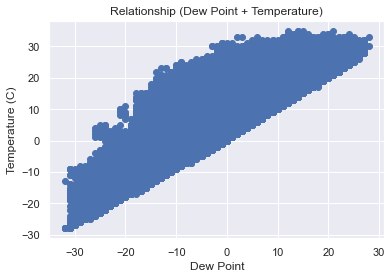

In [116]:
#Visualization of relationship (Dew Point + Temperature)
df1 = df.copy()

df1 = df1[df1['DEWP'] > df1['DEWP'].min()] #Remove Outlier

x = df1['DEWP']
y = df1['TEMP']

plt.xlabel("Dew Point")
plt.ylabel("Temperature (C)")
plt.title("Relationship (Dew Point + Temperature)")
plt.plot(x,y, 'o')

plt.show()

## Develop ML Linear Regression Model

In [13]:
#Data Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train = x_train.values.reshape(-1,1)

x_test = x_test.values.reshape(-1,1)

In [14]:
#Model Development
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

my_LR = LinearRegression().fit(x_train, y_train)

print("Slope bo:", my_LR.intercept_)
print("Coefficient b1:", my_LR.coef_[0])

Slope bo: 7.700492881784548
Coefficient b1: 0.8908584789253008


In [15]:
#Prediction and Performance Evaluation
y_train_predict = my_LR.predict(x_train)

r2_train =  r2_score(y_train, y_train_predict)
print ("R_squared for training set = ", r2_train)

y_predict = my_LR.predict(x_test)

r2_test = r2_score(y_test, y_predict)
print ("R_squared for test set = ", r2_test)

R_squared for training set =  0.8276343828714587
R_squared for test set =  0.8296699648826955


In [16]:
r2_LR_df = pd.DataFrame()
r2_LR_df["LR"]= [r2_train, r2_test]
r2_LR_df.rename(index={0:"Train", 1: "Test"})

,LR
Train,0.827634
Test,0.829670


In [43]:
#User-input Prediction

lst = []
pred_lst = []

validation = "Y"
while validation == "Y":
    choice = float(input("Enter Dew Point: "))
    lst.append(choice)
    validation = input("Enter another value? (Y/N): ").upper()
    
for x in lst:
    pred = my_LR.predict([[x]])[0]
    pred_lst.append(pred)

user_df = pd.DataFrame()
user_df["Dew Point"] = lst
user_df["Temp_pred"] = pred_lst

user_df.round(2)

Enter Dew Point: -1
Enter another value? (Y/N): y
Enter Dew Point: -22
Enter another value? (Y/N): y
Enter Dew Point: -3
Enter another value? (Y/N): n


,Dew Point,Temp_pred
0,-1.0,6.81
1,-22.0,-11.90
2,-3.0,5.03


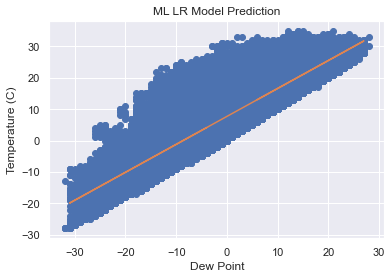

In [115]:
#Visualization of Linear Regression Trend
plt.xlabel("Dew Point")
plt.ylabel("Temperature (C)")
plt.title("ML LR Model Prediction")
plt.plot(x, y, 'o')
plt.plot(x_test,y_predict)
plt.show()

## Multiple Regression

In [26]:
#Correlation matrix of optimal predictors
df[["DEWP", "season", "PRES", "TEMP"]].corr()

,DEWP,season,PRES,TEMP
DEWP,1.000000,-0.452545,-0.798468,0.909570
season,-0.452545,1.000000,0.556422,-0.556397
PRES,-0.798468,0.556422,1.000000,-0.798020
TEMP,0.909570,-0.556397,-0.798020,1.000000


In [62]:
df2 = df.copy()
df2.dropna(subset=["DEWP", "season", "PRES", "TEMP"], inplace=True) #Cleansing
x = df2[["DEWP", "season", "PRES"]].iloc[1::,]
Y = df2["TEMP"]

In [64]:
# Dat
from sklearn.model_selection import train_test_split as SPLIT
X_train, X_test, y_train, y_test = SPLIT(x, y, test_size = 0.20,
                                                   random_state = 10)

In [66]:
#Model Development
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression().fit(X_train, y_train)

In [102]:
#Prediction and Performance Evaluation
y_pred = lr_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lr_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

r2_scores = pd.DataFrame()
r2_scores['LR'] = [r2_train, r2_test]

r2_scores.rename(index = {0: "Train", 1:"Test"}, inplace = True)
r2_scores

,LR
Train,0.856712
Test,0.861187


## Lasso Regression

In [112]:
#Model Development
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=.01).fit(X_train, y_train)


In [117]:
#Prediction and Performance Evaluation
y_pred = lasso_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)

y_pred_train = lasso_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

r2_scores["Lasso"] = [r2_train, r2_test]
r2_scores

,LR,Lasso
Train,0.856712,0.856712
Test,0.861187,0.861185


In [114]:
# Normalize Data
from sklearn.preprocessing import MinMaxScaler

#Lets now create an object of MinMaxScaler as scaler

scaler = MinMaxScaler()

#Fit Scaler
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_scaled_model = Lasso(alpha=.17).fit(X_train_scaled, y_train)